# Create anomaly maps from GBIF data

In [1]:
import pandas as pd
import geopandas as gpd
import pycountry
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
from datetime import datetime

In [2]:
# DATA IMPORT

download_key = '0357096-210914110416597' # vanessa atalanta
                                         # from 1998 to 2020 (including both years)
                                         # has coordinates

occ_df = pd.read_csv(
    filepath_or_buffer=f'gbif/{download_key}.csv',
    parse_dates=['eventDate'],
)

occ_df

,eventDate,year,month,day,countryCode,decimalLatitude,decimalLongitude,speciesKey,species,geodeticDatum
0,2017-07-05,2017,7.0,5.0,GB,52.820494,-1.304008,1898286,Vanessa atalanta,WGS84
1,2017-07-29,2017,7.0,29.0,GB,52.728251,-0.979701,1898286,Vanessa atalanta,WGS84
2,2018-09-23,2018,9.0,23.0,GB,52.749491,-1.482920,1898286,Vanessa atalanta,WGS84
3,2015-08-02,2015,8.0,2.0,GB,52.634093,-0.568145,1898286,Vanessa atalanta,WGS84
4,2017-06-03,2017,6.0,3.0,GB,52.870687,-0.827795,1898286,Vanessa atalanta,WGS84
...,...,...,...,...,...,...,...,...,...,...
1133097,2015-07-22,2015,7.0,22.0,FR,48.585530,2.017580,1898286,Vanessa atalanta,WGS84
1133098,2008-07-23,2008,7.0,23.0,FR,48.617820,2.066200,1898286,Vanessa atalanta,WGS84
1133099,2007-03-28,2007,3.0,28.0,FR,48.729580,2.100970,1898286,Vanessa atalanta,WGS84
1133100,2004-04-15,2004,4.0,15.0,FR,48.705250,2.084150,1898286,Vanessa atalanta,WGS84


In [3]:
# DATA PROCESSING 

# change 2-letter country code to 3-letter
print("different countries of records:\n", occ_df.countryCode.unique())

def change_country_code(alpha_2):
    try:
        alpha_3 = pycountry.countries.get(alpha_2=alpha_2).alpha_3
        return alpha_3
    except:
        # if there's an invalid country code, replace with NA
        return np.nan

occ_df['countryCode'] = occ_df['countryCode'].map(change_country_code)

# remove rows with missing country code
print("# of NA in country code:", occ_df.countryCode.isna().sum())
occ_df = occ_df.dropna(axis='index', subset='countryCode')

occ_df

different countries of records:
 ['GB' 'FR' 'FI' 'DE' 'EE' 'CH' 'LI' 'IT' 'AT' 'NO' 'US' 'CZ' 'CA' 'RU'
 'MX' 'LT' 'DK' 'ES' 'BE' 'UA' 'NL' 'PT' 'RO' 'LU' 'PL' 'SE' 'RS' 'IM'
 'MD' 'BG' 'TR' 'HU' 'HR' 'JE' 'SI' 'IL' 'MA' 'IE' 'PM' 'SK' 'GR' 'CY'
 'FO' 'BY' 'AM' 'AD' 'MK' 'AF' 'EG' 'GE' 'DZ' 'TN' 'AX' 'BM' 'MT' 'LB'
 'GI' 'JO' 'XK' 'IR' 'ME' 'AL' 'BA' 'UZ' 'PS' 'LV' 'GG' 'IQ' 'SM' 'MC'
 'ID' 'SY' nan 'KZ' 'SA' 'DO' 'SJ' 'IS' 'AZ' 'KG' 'HT']
# of NA in country code: 9


,eventDate,year,month,day,countryCode,decimalLatitude,decimalLongitude,speciesKey,species,geodeticDatum
0,2017-07-05,2017,7.0,5.0,GBR,52.820494,-1.304008,1898286,Vanessa atalanta,WGS84
1,2017-07-29,2017,7.0,29.0,GBR,52.728251,-0.979701,1898286,Vanessa atalanta,WGS84
2,2018-09-23,2018,9.0,23.0,GBR,52.749491,-1.482920,1898286,Vanessa atalanta,WGS84
3,2015-08-02,2015,8.0,2.0,GBR,52.634093,-0.568145,1898286,Vanessa atalanta,WGS84
4,2017-06-03,2017,6.0,3.0,GBR,52.870687,-0.827795,1898286,Vanessa atalanta,WGS84
...,...,...,...,...,...,...,...,...,...,...
1133097,2015-07-22,2015,7.0,22.0,FRA,48.585530,2.017580,1898286,Vanessa atalanta,WGS84
1133098,2008-07-23,2008,7.0,23.0,FRA,48.617820,2.066200,1898286,Vanessa atalanta,WGS84
1133099,2007-03-28,2007,3.0,28.0,FRA,48.729580,2.100970,1898286,Vanessa atalanta,WGS84
1133100,2004-04-15,2004,4.0,15.0,FRA,48.705250,2.084150,1898286,Vanessa atalanta,WGS84


### PRELIMINARY ANALYSIS

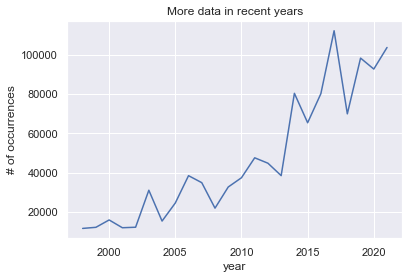

In [4]:
# total number of occurrences per year introduces a significant bias to the
# anomalies
# -> exclude earlier records?

data = (
    occ_df
    .groupby('year', as_index=False)
    .size()
)

fig, ax = plt.subplots()
sns.lineplot(
    data=data, x='year', y='size', 
    ax=ax
)
ax.set_title("More data in recent years")
ax.set_ylabel("# of occurrences")
fig.savefig('../figs/kaliningrad/vatalanta/gbif-total-occ.png', dpi=600, bbox_inches='tight')

In [5]:
# plot distribution of datetime series
# introduce numeric metric (number of day within year) instead of dates
# https://stackoverflow.com/questions/38567358/how-to-plot-pandas-datetime-series-in-seaborn-distplot
# -> remove records of Jan 1st?

def days_in_year(date):
    return (date - datetime(date.year, 1, 1)).days

occ_df['daysDate'] = occ_df['eventDate'].map(days_in_year)

/tmp/ipykernel_13072/1922226290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occ_df['daysDate'] = occ_df['eventDate'].map(days_in_year)


daysDate
0      18469
1         34
2         33
3         37
4         40
       ...  
361      101
362       84
363      100
364      670
365      186
Length: 366, dtype: int64

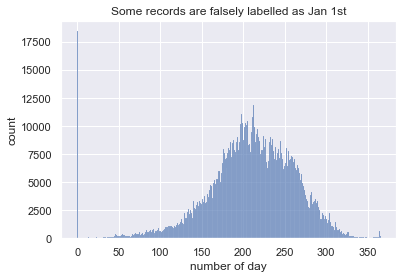

In [6]:
ax = sns.histplot(occ_df['daysDate'], binrange=(-1,366), binwidth=1)
ax.set_xlabel("number of day")
ax.set_ylabel("count")
ax.set_title("Some records are falsely labelled as Jan 1st")
plt.savefig('../figs/kaliningrad/vatalanta/gbif-seasonal-dis.png', dpi=600, bbox_inches='tight')

occ_df.groupby('daysDate').size()

### ANOMALY MAPS

In [7]:
# COMPUTING ANOMALIES

def which_quarter(ele):
    if ele <= 3:
        val = 1
    elif ele <= 6:
        val = 2
    elif ele <= 9:
        val = 3
    elif ele <= 12:
        val = 4
    else:
        val = np.nan
    return val

# add quarter to dataframe
occ_df['quarter'] = occ_df['month'].map(which_quarter)

# number of observations per quarter
occ_per_quarter = (
    occ_df
    .groupby(['species', 'countryCode', 'year', 'quarter'], as_index=False)
    .size()
)

# mean & standard deviation per quarter for all years
mean_per_quarter = (
    occ_per_quarter
    .groupby(['species', 'countryCode', 'quarter'], as_index=False)
    ['size'].mean()
)
std_per_quarter = (
    occ_per_quarter
    .groupby(['species', 'countryCode', 'quarter'], as_index=False)
    ['size'].std()
)

# adding to dataframe and computing z-score (anomaly metric)
occ_per_quarter = (
    occ_per_quarter
    .merge(right=mean_per_quarter, on=['species', 'countryCode', 'quarter'],
           suffixes=(None, '_mean'))
    .merge(right=std_per_quarter, on=['species', 'countryCode', 'quarter'],
           suffixes=(None, '_std'))
)
occ_per_quarter['anom'] = (
    (occ_per_quarter['size']
    - occ_per_quarter['size_mean'])
    / occ_per_quarter['size_std']
)

occ_per_quarter

/tmp/ipykernel_13072/1958623576.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occ_df['quarter'] = occ_df['month'].map(which_quarter)


,species,countryCode,year,quarter,size,size_mean,size_std,anom
0,Vanessa atalanta,AFG,2021,3.0,1,1.00,NaN,NaN
1,Vanessa atalanta,AFG,2021,4.0,1,1.00,NaN,NaN
2,Vanessa atalanta,ALA,1998,1.0,1,1.20,0.447214,-0.447214
3,Vanessa atalanta,ALA,2000,1.0,1,1.20,0.447214,-0.447214
4,Vanessa atalanta,ALA,2008,1.0,1,1.20,0.447214,-0.447214
...,...,...,...,...,...,...,...,...
2565,Vanessa atalanta,UZB,2008,4.0,1,1.25,0.500000,-0.500000
2566,Vanessa atalanta,UZB,2015,4.0,1,1.25,0.500000,-0.500000
2567,Vanessa atalanta,UZB,2019,4.0,2,1.25,0.500000,1.500000
2568,Vanessa atalanta,UZB,2020,4.0,1,1.25,0.500000,-0.500000


In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# some missing iso country codes!
world[world.iso_a3 == '-99']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [9]:
# replace missing alpha-3 country codes
name = world.loc[world.iso_a3 == '-99', 'name'].values
iso = ['NOR', 'FRA', '-99', '-99', '-99']

print("names =",name)
print("alpha-3 codes =",iso)

for n, i in zip(name, iso):
    world.loc[world['name'] == n, 'iso_a3'] = i

world[world.name == 'Norway']

names = ['Norway' 'France' 'N. Cyprus' 'Somaliland' 'Kosovo']
alpha-3 codes = ['NOR', 'FRA', '-99', '-99', '-99']


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,NOR,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."


In [10]:
# add shapely geometry
occ_per_quarter_shape = (
    occ_per_quarter
    .merge(world[['iso_a3', 'geometry']], how='left',
           left_on='countryCode', right_on='iso_a3')
    .drop(columns='iso_a3')
)

# some countryCodes are still without geometry!
occ_per_quarter_shape[occ_per_quarter_shape.geometry == None].countryCode.unique()

array(['ALA', 'AND', 'BMU', 'FRO', 'GGY', 'GIB', 'IMN', 'JEY', 'LIE',
       'MCO', 'MLT', 'SJM', 'SMR', 'SPM'], dtype=object)

In [11]:
yrs   = occ_per_quarter_shape['year'].sort_values().unique()
quars = occ_per_quarter_shape['quarter'].sort_values().unique()
z = 2.5

def months_within_quarter(quar):
    switch = {
        1: 'Jan, Feb & Mar',
        2: 'Apr, May & Jun',
        3: 'Jul, Aug & Sep',
        4: 'Oct, Nov & Dec'
    }
    return switch.get(quar)

for yr in yrs:

    fig, axs = plt.subplots(
        2,2, figsize=(10,7), 
        facecolor='w',
        sharex=True, sharey=True,
        num=42, clear=True, # use same figure, but cleared (prevents memory overflow)
        #constrained_layout=True, 
        #subplot_kw=dict(aspect='equal')
    )
    axs = axs.ravel()
    fig.suptitle(f'Occurrences of {occ_per_quarter.species[0]} in {yr}', fontsize=15)

    for i, quar in enumerate(quars):
        gpd_df = gpd.GeoDataFrame(
            occ_per_quarter_shape[
                (occ_per_quarter_shape['year'] == yr)
                & (occ_per_quarter_shape['quarter'] == quar)
            ],
            crs = 'EPSG:4326'
        )

        gpd_df.plot(column='anom', vmin=z*-1, vmax=z, 
                    cmap='bwr', ax=axs[i])
        world.plot(facecolor=(1,0,0,0), edgecolor='black', lw=0.3, ax=axs[i])
        axs[i].set_title(months_within_quarter(quar))
        axs[i].set_xlim(-15, 50)
        axs[i].set_ylim(20, 72)
    
    patch_col = axs[0].collections[0]
    cb = fig.colorbar(patch_col, ax=axs, shrink=0.7)
    cb.set_label('z-score [std]')

    plt.figtext(
        x=0.1, y=0.08, 
        s=f'data from gbif.org | anomalies computed per country & quarter | ref period: {np.min(yrs)}-{np.max(yrs)}',
        fontdict={'alpha': 0.7, 'fontsize': 5}
    )

    fig.savefig(
        f'../figs/kaliningrad/vatalanta/anom-maps/anom-{yr}.png',
        bbox_inches='tight', dpi=400
    )

    plt.close(fig)

/tmp/ipykernel_13072/4236703393.py:44: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(patch_col, ax=axs, shrink=0.7)


### UPDATE: RE-DO ANALYSIS

In [12]:
# focus on records from 2009 onwards & remove Jan 1st
# (some records have actually missing month and day values, but are recorded as
# Jan 1st in eventDate!)

occ_df_shrt = (
    occ_df[(occ_df.year >= 2009) & (occ_df.daysDate != 0)]
)

occ_df_shrt.groupby('month').size()

month
1.0       1401
2.0       4723
3.0      11468
4.0      22177
5.0      61095
6.0     122013
7.0     225858
8.0     208408
9.0     150202
10.0     69099
11.0     17035
12.0      2805
dtype: int64

### Is the Swedish BMS consistent?

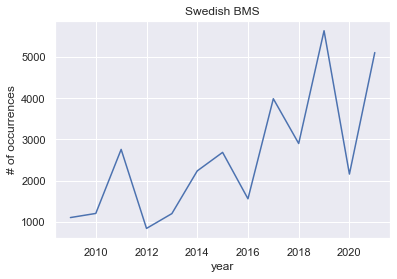

In [25]:
# let's focus on 2009-2020 as those years are the temporal scope of the 
# Swedish Butterfly Monitoring Scheme:
# https://www.gbif.org/dataset/be77e203-486c-4651-91b9-8347968b728c#description

occ_swe = occ_df_shrt[occ_df_shrt.countryCode == 'SWE']

data = (
    occ_swe
    .groupby('year', as_index=False)
    .size()
)

fig, ax = plt.subplots()
sns.lineplot(
    data=data, x='year', y='size', 
    ax=ax
)
ax.set_title("Swedish BMS")
ax.set_ylabel("# of occurrences")
plt.show()

### Anomaly maps

In [13]:
# number of observations per quarter
occ_per_quarter = (
    occ_df_shrt
    .groupby(['species', 'countryCode', 'year', 'quarter'], as_index=False)
    .size()
)

# mean & standard deviation per quarter for all years
mean_per_quarter = (
    occ_per_quarter
    .groupby(['species', 'countryCode', 'quarter'], as_index=False)
    ['size'].mean()
)
std_per_quarter = (
    occ_per_quarter
    .groupby(['species', 'countryCode', 'quarter'], as_index=False)
    ['size'].std()
)

# adding to dataframe and computing z-score (anomaly metric)
occ_per_quarter = (
    occ_per_quarter
    .merge(right=mean_per_quarter, on=['species', 'countryCode', 'quarter'],
           suffixes=(None, '_mean'))
    .merge(right=std_per_quarter, on=['species', 'countryCode', 'quarter'],
           suffixes=(None, '_std'))
)
occ_per_quarter['anom'] = (
    (occ_per_quarter['size']
    - occ_per_quarter['size_mean'])
    / occ_per_quarter['size_std']
)

occ_per_quarter

,species,countryCode,year,quarter,size,size_mean,size_std,anom
0,Vanessa atalanta,AFG,2021,3.0,1,1.000000,NaN,NaN
1,Vanessa atalanta,AFG,2021,4.0,1,1.000000,NaN,NaN
2,Vanessa atalanta,ALB,2013,4.0,3,1.800000,1.095445,1.095445
3,Vanessa atalanta,ALB,2018,4.0,3,1.800000,1.095445,1.095445
4,Vanessa atalanta,ALB,2019,4.0,1,1.800000,1.095445,-0.730297
...,...,...,...,...,...,...,...,...
1697,Vanessa atalanta,USA,2021,4.0,1083,278.230769,307.977043,2.613082
1698,Vanessa atalanta,UZB,2015,4.0,1,1.333333,0.577350,-0.577350
1699,Vanessa atalanta,UZB,2019,4.0,2,1.333333,0.577350,1.154701
1700,Vanessa atalanta,UZB,2020,4.0,1,1.333333,0.577350,-0.577350


In [14]:
# add shapely geometry
occ_per_quarter_shape = (
    occ_per_quarter
    .merge(world[['iso_a3', 'geometry']], how='left',
           left_on='countryCode', right_on='iso_a3')
    .drop(columns='iso_a3')
)

# some countryCodes are still without geometry!
occ_per_quarter_shape[occ_per_quarter_shape.geometry == None].countryCode.unique()

array(['AND', 'BMU', 'FRO', 'GGY', 'GIB', 'IMN', 'JEY', 'LIE', 'MCO',
       'MLT', 'SMR', 'SPM'], dtype=object)

In [15]:
# plotting
yrs   = occ_per_quarter_shape['year'].sort_values().unique()
quars = occ_per_quarter_shape['quarter'].sort_values().unique()
z = 2.5

def months_within_quarter(quar):
    switch = {
        1: 'Jan, Feb & Mar',
        2: 'Apr, May & Jun',
        3: 'Jul, Aug & Sep',
        4: 'Oct, Nov & Dec'
    }
    return switch.get(quar)

for yr in yrs:

    fig, axs = plt.subplots(
        2,2, figsize=(10,7), 
        facecolor='w',
        sharex=True, sharey=True,
        num=42, clear=True, # use same figure, but cleared (prevents memory overflow)
        #constrained_layout=True, 
        #subplot_kw=dict(aspect='equal')
    )
    axs = axs.ravel()
    fig.suptitle(f'Occurrences of {occ_per_quarter.species[0]} in {yr}', fontsize=15)

    for i, quar in enumerate(quars):
        gpd_df = gpd.GeoDataFrame(
            occ_per_quarter_shape[
                (occ_per_quarter_shape['year'] == yr)
                & (occ_per_quarter_shape['quarter'] == quar)
            ],
            crs = 'EPSG:4326'
        )

        gpd_df.plot(column='anom', vmin=z*-1, vmax=z, 
                    cmap='bwr', ax=axs[i])
        world.plot(facecolor=(1,0,0,0), edgecolor='black', lw=0.3, ax=axs[i])
        axs[i].set_title(months_within_quarter(quar))
        axs[i].set_xlim(-15, 50)
        axs[i].set_ylim(20, 72)
    
    patch_col = axs[0].collections[0]
    cb = fig.colorbar(patch_col, ax=axs, shrink=0.7)
    cb.set_label('z-score [std]')

    plt.figtext(
        x=0.1, y=0.08, 
        s=f'data from gbif.org | anomalies computed per country & quarter | ref period: {np.min(yrs)}-{np.max(yrs)}',
        fontdict={'alpha': 0.7, 'fontsize': 5}
    )

    fig.savefig(
        f'../figs/kaliningrad/vatalanta/anom-maps-from-2009/anom-{yr}.png',
        bbox_inches='tight', dpi=400
    )

    plt.close(fig)

/tmp/ipykernel_13072/1261179422.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(patch_col, ax=axs, shrink=0.7)


### SOME EXTRAS

(20.0, 72.0)

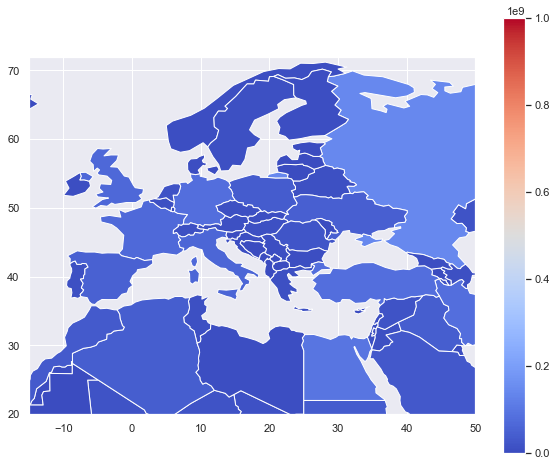

In [16]:
# how to plot with geopandas and shapely...
fig, ax = plt.subplots(figsize=(10,8))
world.plot('pop_est', legend=True, cmap='coolwarm', vmin=0, vmax=1e9, ax=ax)
ax.set_xlim(-15, 50)
ax.set_ylim(20, 72)